### Importing the necessary modules

In [2]:
import numpy as np 
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import neighbors, model_selection, preprocessing, metrics, datasets, base

### Collecting, Analyzing and Visualizing the data

In [16]:
data = datasets.load_digits()

print(dir(data))

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']


In [17]:
print(data.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [18]:
# Creating a data frame

df = pd.DataFrame(data.data, columns = data.feature_names)
df['target'] = data.target
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [20]:
df['target'].value_counts().sort_values(ascending = False)

3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: target, dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

In [23]:
# Checking for null values

print(any(df.isna().sum()))

False


In [24]:
df.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


In [29]:
num_attr = df.columns[:-1]
target = df.columns[-1]

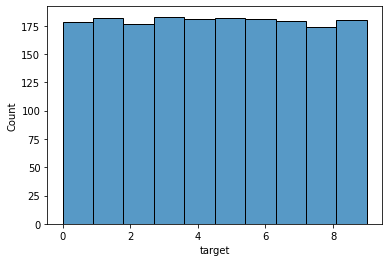

In [33]:
# Histogram

sns.histplot(x = target, data = df, bins = len(np.unique(df[target])))
plt.show()

<Figure size 432x288 with 0 Axes>

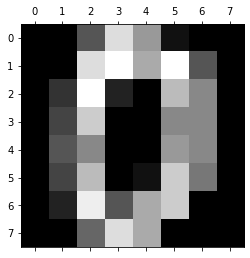

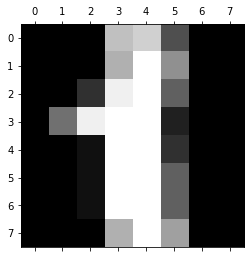

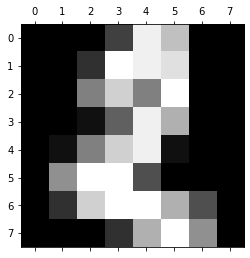

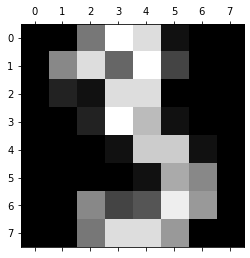

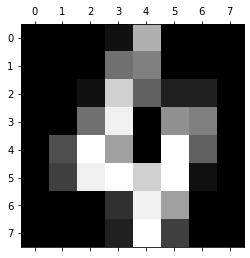

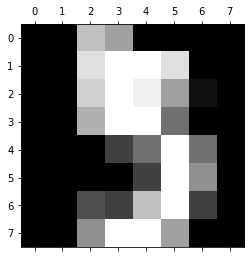

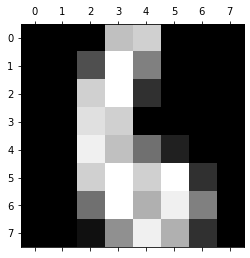

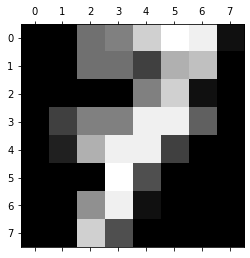

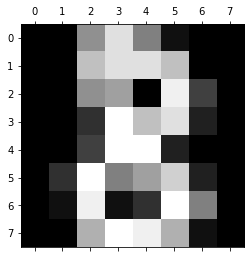

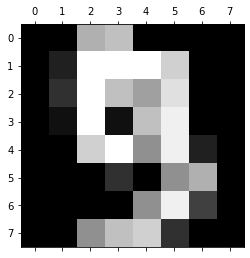

In [44]:
# Visualizing images using matplotlib

for i in range(10):
    X = df.iloc[i, :-1].values.reshape(8, 8)
    plt.gray()
    plt.matshow(X)
plt.show()

### Data Preperation

In [47]:
X = df.drop(target, axis = 1).values
y = df[target].values

In [51]:
# Stratified Splitting

strat_split = model_selection.StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 3)

for train_index, test_index in strat_split.split(df, df[target]):
    X_train = X[train_index]
    X_test = X[test_index]
    y_train = y[train_index]
    y_test = y[test_index]

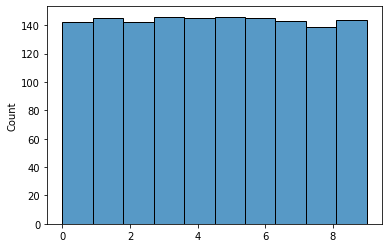

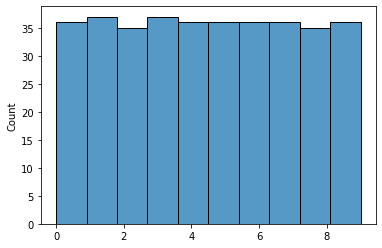

In [69]:
# Checking whether the samples are uniformely distributed

sns.histplot(x = y_train, bins = len(np.unique(y_train)))
plt.show()

sns.histplot(x = y_test)
plt.show()

### Training the model and Evaluating it's performance

In [96]:
# Implementing KNN from scratch

class KNNClassifier:
    
    def __init__(self, k = 3):
        self.k = k
        
    def fit(self, X, y):
        self.X = X
        self.y = y
        
    def predict(self, X):
        labels, i = np.zeros(X.shape[0]), 0
        for x in X:
            distances = [self.dist(x, x_) for x_ in self.X]
            k_nearest_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = self.y[k_nearest_indices]
            labels[i] = stats.mode(k_nearest_labels, keepdims = False)[0]
            i += 1
        return labels

    def score(self, X, y):
        y_pred = self.predict(X)
        acc = np.sum(y == y_pred) / len(y)
        return acc
    
    @staticmethod
    def dist(x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

In [101]:
clf = KNNClassifier(k = 1)

clf.fit(X_train, y_train)

In [102]:
y_train_pred = clf.predict(X_train)

train_score = clf.score(X_train, y_train)
print("Train Accuracy :", train_score)

Train Accuracy : 1.0


In [103]:
print(y_train_pred)

[4. 7. 5. ... 4. 1. 1.]


In [107]:
# Implementing KNN through Sklearn

model = neighbors.KNeighborsClassifier(n_neighbors = 1)

model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [108]:
y_train_pred = model.predict(X_train)

train_score = model.score(X_train, y_train)
print("Train Accuracy :", train_score)

Train Accuracy : 1.0


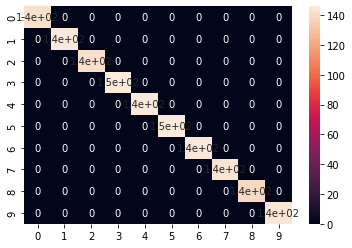

In [109]:
# # Confusion Matrix

conf_matrix = metrics.confusion_matrix(y_train, y_train_pred)

sns.heatmap(conf_matrix, annot = True)
plt.show()

In [ ]:
# Classification Metrics

precision = metrics.precision_score(y_train, y_train_pred, average = 'weighted')
recall = metrics.recall_score(y_train, y_train_pred, average = 'weighted')
f1_score = metrics.f1_score(y_train, y_train_pred, average = 'weighted')

print("Precision :", precision)
print("Recall :", recall)
print("F1 Score :", f1_score)

In [110]:
# Classification Report

print(metrics.classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       145
           2       1.00      1.00      1.00       142
           3       1.00      1.00      1.00       146
           4       1.00      1.00      1.00       145
           5       1.00      1.00      1.00       146
           6       1.00      1.00      1.00       145
           7       1.00      1.00      1.00       143
           8       1.00      1.00      1.00       139
           9       1.00      1.00      1.00       144

    accuracy                           1.00      1437
   macro avg       1.00      1.00      1.00      1437
weighted avg       1.00      1.00      1.00      1437



### Validating the model

In [111]:
y_test_pred = model.predict(X_test)

print("Testing Accuracy :", model.score(X_test, y_test))

Testing Accuracy : 0.9833333333333333


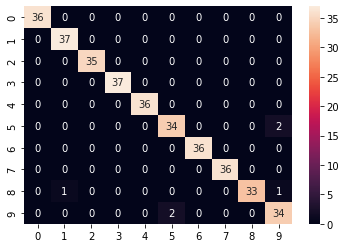

In [112]:
# Confusion Matrix

conf_matrix = metrics.confusion_matrix(y_test, y_test_pred)

sns.heatmap(conf_matrix, annot = True)
plt.show()

In [ ]:
# Classification Metrics

precision = metrics.precision_score(y_test, y_test_pred, average = 'weighted')
recall = metrics.recall_score(y_test, y_test_pred, average = 'weighted')
f1_score = metrics.f1_score(y_test, y_test_pred, average = 'weighted')

print("Precision :", precision)
print("Recall :", recall)
print("F1 Score :", f1_score)

In [113]:
# Classification Report

print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.97      1.00      0.99        37
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        37
           4       1.00      1.00      1.00        36
           5       0.94      0.94      0.94        36
           6       1.00      1.00      1.00        36
           7       1.00      1.00      1.00        36
           8       1.00      0.94      0.97        35
           9       0.92      0.94      0.93        36

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



#### Cross Validation

In [116]:
scores = model_selection.cross_val_score(base.clone(model), X, y, cv = 10)

print("Cross Validation Scores :", scores)
print("Average Cross Validation Score :", np.sum(scores) / len(scores))

Cross Validation Scores : [0.93333333 0.99444444 0.97222222 0.97222222 0.96666667 0.98333333
 0.99444444 0.98882682 0.97765363 0.96648045]
Average Cross Validation Score : 0.9749627560521414
